(-0.2, 4.2, -0.1, 2.1)

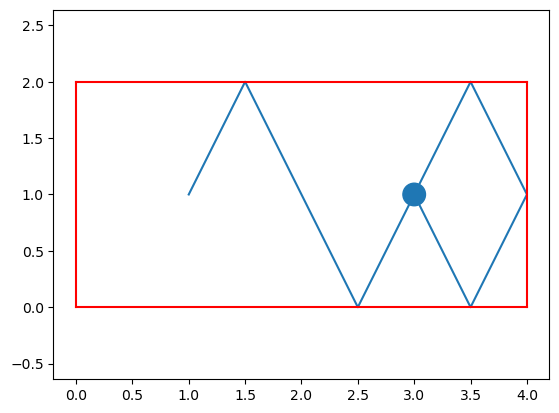

In [11]:
import matplotlib.pyplot as plt
width = 2
length =4
x=1
y=1
t=0
x_list=[x]
y_list=[y]
t_list=[0]
vx=0.1
vy=0.2
t_max=40
num_step=1000
dt = t_max/num_step


for i in range(num_step):
    t=t+dt
    x=x+vx*dt
    y=y+vy*dt
    
    #check if the ball goes out the boundary
    if x<0:
        x=-x
        vx=-vx
    if x>length:
        x = 2*length-x
        vx=-vx
    if y<0:
        y=-y
        vy=-vy
    if y>width:
        y=2*width-y
        vy=-vy
    
    t_list.append(t)
    x_list.append(x)
    y_list.append(y)

#plot the trajectory
plt.plot(x_list,y_list)
fig =plt.gcf()
ax =plt.gca()
lines = ax.get_lines()
trajectory = lines[0]

#plotting the four boundaries
plt.plot([0, 0],[0,width],'r')
plt.plot([length, length],[0,width],'r')
plt.plot([0, length],[0,0],'r')
b=plt.plot([0, length],[width,width],'r')

#add the ball
circle=plt.Circle((x,y), 0.1,color='tab:blue')
ax.add_patch(circle)
ax.axis('equal')


In [12]:
def draw_frame(frame_index):
    step = int(num_step/200*frame_index) #calculating number of step per frame, assuming total 200 frames
    trajectory.set_data(x_list[:step],y_list[:step])
    circle.center=(x_list[step],y_list[step])

In [15]:
import IPython
import matplotlib.animation as animation
anim = animation.FuncAnimation(fig, draw_frame, frames=200, interval=20)
IPython.display.HTML(anim.to_jshtml())